<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Создадим-корпус-текстов" data-toc-modified-id="Создадим-корпус-текстов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Создадим корпус текстов</a></span></li><li><span><a href="#Произведем-лемматизацию-корпуса-и-очистим-от-лишних-символов" data-toc-modified-id="Произведем-лемматизацию-корпуса-и-очистим-от-лишних-символов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Произведем лемматизацию корпуса и очистим от лишних символов</a></span></li><li><span><a href="#Объединим-обработанный-корпус-с-исходными-данными" data-toc-modified-id="Объединим-обработанный-корпус-с-исходными-данными-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Объединим обработанный корпус с исходными данными</a></span></li><li><span><a href="#Датасет-разобьем-на-обучающую,-валидационную-и-тестовую-выборки." data-toc-modified-id="Датасет-разобьем-на-обучающую,-валидационную-и-тестовую-выборки.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Датасет разобьем на обучающую, валидационную и тестовую выборки.</a></span></li><li><span><a href="#Векторизируем-данные." data-toc-modified-id="Векторизируем-данные.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Векторизируем данные.</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LGBMClassifier</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-выборки" data-toc-modified-id="Тестирование-лучшей-выборки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование лучшей выборки</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

**Задача проекта:** Обучить модель классифицировать комментарии на позитивные и негативные. 

**Целевая метрика:** Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Обзор данных

In [1]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install spaCy (run in terminal/prompt)
import sys
!{sys.executable} -m pip install spacy
# Download spaCy's  'en' Model
!{sys.executable} -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.9 MB 2.6 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Импортируем необходимые библиотеки

In [3]:
# Импорт стандартных библиотек
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

# Импорт дополнительных библиотек
import spacy 
import en_core_web_sm
import re
import nltk
import seaborn as sns 
from tqdm import notebook
from nltk.corpus import stopwords
from lightgbm import LGBMClassifier
from pymystem3 import Mystem
from nltk.stem import WordNetLemmatizer
from catboost import CatBoostClassifier

In [4]:
df = pd.read_csv('/datasets/toxic_comments.csv')

Напишем функцию для обзора данных:

In [5]:
def data_overview(data):
    
    # Проверка на наличие явных дубликатов
    duplicated_values = data.duplicated().sum()
    if duplicated_values > 0:
        print('\n\033[91mОбнаружены дубликаты данных\n\033[0m')
        display(duplicated_values)
    else:
        print('\n\033[91mЯвных дубликатов нет\n\033[0m')
                
        
    # Проверка наличия пропущенных значений     
    missing_values = data.isna().sum()
    if missing_values.sum() > 0:
        print('\n\033[91mОбнаружены пропущенные значения\n\033[0m')
        display(missing_values)    
    else:
        print('\n\033[91mПропущенных значений нет\n\033[0m')
    
    
    # Выведем первые 5 строк данных
    display(data.head())
    
    # Вывод общей информации о Датасете
    data.info()

In [6]:
data_overview(df)


Явных дубликатов нет


Пропущенных значений нет



,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


Визуализаруем сбалансированность классов:

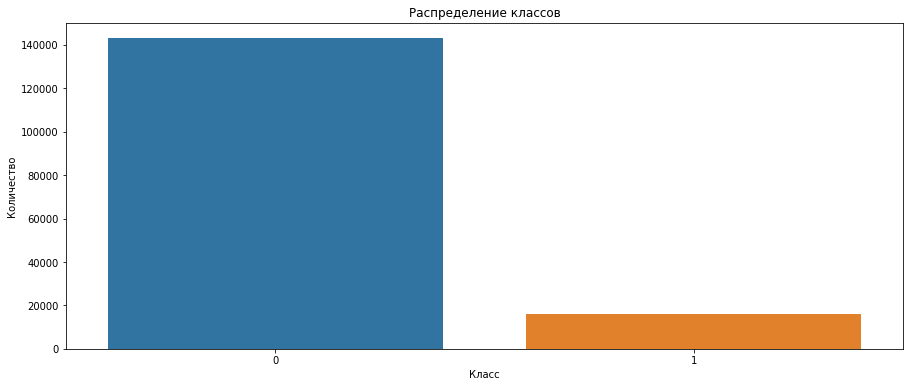

In [7]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='toxic', data=df)

# Добавляем подписи к осям:
ax.set_title('Распределение классов')
ax.set_xlabel('Класс')
ax.set_ylabel('Количество');

### Вывод:
Входе обзора данных выяснилось:

* Датасет содержит **`159292 строк`**.
* Имеется лишняя колонка **`Unnamed: 0`**.
* Тип данных соответсвует значениям в колонках.
* Явных дубликатов нет.
* Пропущенных значений нет.

## Подготовка данных

В связи с неактальностью колонки Unnamed: 0 - произведем её удаление.

In [8]:
df = df.drop(columns=['Unnamed: 0'])
df.head(1)

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0


### Создадим корпус текстов

In [9]:
corpus = df['text'].values
display(corpus)

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

### Произведем лемматизацию корпуса и очистим от лишних символов

Воспользуемся решением spyCy

In [10]:
nlp = spacy.load("en_core_web_sm")

def spacy(data):
    sentence = data
    doc = nlp(sentence)
    lemm_text = " ".join([token.lemma_ for token in doc]) 
    return lemm_text

In [11]:
def clear_text (lemm_text):
    pattern = re.sub(r'[^a-zA-Z]', ' ', lemm_text)
    pattern.split()
    pattern = " ".join(pattern.split())
    return pattern

In [12]:
# Применение функции spacy к данным
for i in notebook.tqdm(range(len(corpus))):
    corpus[i] = spacy(clear_text(corpus[i]))
display(corpus)

  0%|          | 0/159292 [00:00<?, ?it/s]

array(['explanation why the edit make under my username Hardcore Metallica Fan be revert they weren t vandalism just closure on some gas after I vote at New York Dolls FAC and please don t remove the template from the talk page since I m retire now',
       'd aww he match this background colour I m seemingly stuck with thank talk January UTC',
       'hey man I m really not try to edit war it s just that this guy be constantly remove relevant information and talk to I through edit instead of my talk page he seem to care more about the formatting than the actual info',
       ...,
       'Spitzer Umm there s no actual article for prostitution ring Crunch Captain',
       'and it look like it be actually you who put on the speedy to have the first version delete now that I look at it',
       'and I really don t think you understand I come here and my idea be bad right away what kind of community go you have bad idea go away instead of help rewrite they'],
      dtype=object)

### Объединим обработанный корпус с исходными данными

In [13]:
# Объединение корпуса и исходного датасета
data_corpus = pd.DataFrame(corpus)
df['lemm_text'] = data_corpus
display(df.head())

,text,toxic,lemm_text
0,explanation why the edit make under my usernam...,0,explanation why the edit make under my usernam...
1,d aww he match this background colour I m seem...,0,d aww he match this background colour I m seem...
2,hey man I m really not try to edit war it s ju...,0,hey man I m really not try to edit war it s ju...
3,More I can t make any real suggestion on impro...,0,More I can t make any real suggestion on impro...
4,you sir be my hero any chance you remember wha...,0,you sir be my hero any chance you remember wha...


### Датасет разобьем на обучающую, валидационную и тестовую выборки.

In [14]:
# Разбивка данных на train и valid
features = df['lemm_text']
target = df['toxic']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=2024, stratify=target)

display(features_train.shape)
display(target_train.shape)
display(features_valid.shape)
display(target_valid.shape)

(95575,)

(95575,)

(63717,)

(63717,)

In [15]:
# Разбивка данных на valid и test
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=2024)

display(features_valid.shape)
display(target_valid.shape)
display(features_test.shape)
display(target_test.shape)
display()

(31858,)

(31858,)

(31859,)

(31859,)

### Векторизируем данные.

In [16]:
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=stopwords)
features_train = count_tf_idf.fit_transform(features_train)
features_valid = count_tf_idf.transform(features_valid)
features_test = count_tf_idf.transform(features_test)

display(features_train.shape)
display(target_train.shape)
display(features_valid.shape)
display(target_valid.shape)
display(features_test.shape)
display(target_test.shape)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(95575, 115454)

(95575,)

(31858, 115454)

(31858,)

(31859, 115454)

(31859,)

### Вывод: 
Все данные преобразованы: произведена их лемматизация, удалены стоп слова, а лемматизированные выражения преобразованы в векторы.

## Обучение

Обучим модели: **`LogisticRegression`**, **`LGBMClassifier`**, **`DecisionTreeClassifier`** и выберем из них лучшую.

### LogisticRegression

In [17]:
model_LR = LogisticRegression(random_state=2024,
                              class_weight='balanced',
                              C=10)
model_LR.fit(features_train, target_train)
prediction_valid = model_LR.predict(features_valid)
f1_valid = f1_score(target_valid, prediction_valid)

display(f1_valid)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7700378898280384

### LGBMClassifier

In [18]:
model_LGBMC = LGBMClassifier(random_state=2024,
                             class_weight='balanced')
model_LGBMC.fit(features_train, target_train)
prediction_valid = model_LGBMC.predict(features_valid)
f1_valid = f1_score(target_valid, prediction_valid)

display(f1_valid)

0.7481303795682235

### DecisionTreeClassifier 

In [20]:
model_tree = DecisionTreeClassifier(max_depth=None,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              random_state=2024,
                              max_leaf_nodes=None
)
model_tree.fit(features_train, target_train)
prediction_valid = model_tree.predict(features_valid)
f1_valid = f1_score(target_valid, prediction_valid)

display(f1_valid)

0.7209375

### Вывод:
Мы обучили три модели:**`LogisticRegression`** **`LGBMClassifier`** **`DecisionTreeClassifier`**

Лучшую метрику `F1` на валидационной выборке, равную `0.76`, показала модель `LogisticRegression`.

## Тестирование лучшей выборки 

Проверим лучшую модель **`LogisticRegression`**

In [21]:
prediction_test = model_LR.predict(features_test)
f1_test = f1_score(target_test, prediction_test)

display(f1_test)

0.7717088885634792

Результат на тестовой выборке составляет **0.77** что является проходным значением для нашей целевой метрики `(F1 не меньше 0.75)`

## Общий вывод

Мы провели обзор и предварительную подготовку данных. 

В ходе исследования мы обучали и тестировали три разных типа моделей: **`LogisticRegression`**, **`LGBMClassifier`** и **`DecisionTreeClassifier`**, и оценивали их эффективность с использованием метрики **`F1`**  для валидационной выборки.

Поскольку исходные данные были в достаточно "чистыми", поэтому мы выполнили только лемматизацию имеющихся комментариев, удалили стоп-слова и произвели их векторизацию для последующего обучения моделей.

Мы обучали три типа моделей:
**`LogisticRegression`**
**`LGBMClassifier`**
**`DecisionTreeClassifier`**

Лучший результат на валидационной выборке показала модель **`LogisticRegression`** - **`F1 = 0.77`**. Она была выбрана как лучшая модель и проверена на соответствие уровню ключевой метрики **`F1`** на тестовой выборке. Итоговая оценка на тестовой выборке составляет **`0.77`**.
 
Модель можно использовать для прогноза.
